# Greadien Boosting and GridSearch

## The Data


<img src="mushroom.jpg" width="400" height="400">

### Mushroom Hunting: Edible or Poisonous?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

In [2]:
# data
df = pd.read_csv('..\data\mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Prep

In [4]:
X = df.drop('class', axis = 1)
y = df['class']

## Encode

In [5]:
X = pd.get_dummies(X, drop_first= True)

## Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 101)

## Gradient Boosting and GridSearchCV

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a single regression tree is in

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_grid = {'n_estimators' : [1,5,10,40,100], 
              'max_depth' :[2,3,4,5,6]
             }

In [12]:
gb_model = GradientBoostingClassifier()

In [13]:
grid = GridSearchCV(gb_model, param_grid )

## Fit to Train Data with GridSeachCV

In [14]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 40, 100]})

In [15]:
grid.best_params_

{'max_depth': 2, 'n_estimators': 100}

## Performance

In [16]:
preds = grid.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [18]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1274
           p       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Faeture Importances

In [19]:
grid.best_estimator_.feature_importances_

array([3.18530750e-16, 6.35625529e-16, 1.60215921e-16, 0.00000000e+00,
       0.00000000e+00, 1.58389032e-03, 0.00000000e+00, 7.23651631e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.43496569e-17,
       2.12488065e-03, 6.68663811e-02, 1.13661641e-03, 4.63806486e-02,
       3.79709474e-02, 5.76707927e-04, 5.94411141e-01, 4.48585256e-03,
       0.00000000e+00, 0.00000000e+00, 1.03850386e-16, 2.42989238e-03,
       5.08252445e-02, 0.00000000e+00, 1.23218223e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.72727067e-18, 0.00000000e+00, 0.00000000e+00, 2.82505977e-17,
       2.48941025e-04, 0.00000000e+00, 1.02737882e-01, 0.00000000e+00,
       9.13311672e-03, 8.57350958e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.18977039e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [20]:
feat_imp = grid.best_estimator_.feature_importances_

In [21]:
feat_imp

array([3.18530750e-16, 6.35625529e-16, 1.60215921e-16, 0.00000000e+00,
       0.00000000e+00, 1.58389032e-03, 0.00000000e+00, 7.23651631e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.43496569e-17,
       2.12488065e-03, 6.68663811e-02, 1.13661641e-03, 4.63806486e-02,
       3.79709474e-02, 5.76707927e-04, 5.94411141e-01, 4.48585256e-03,
       0.00000000e+00, 0.00000000e+00, 1.03850386e-16, 2.42989238e-03,
       5.08252445e-02, 0.00000000e+00, 1.23218223e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.72727067e-18, 0.00000000e+00, 0.00000000e+00, 2.82505977e-17,
       2.48941025e-04, 0.00000000e+00, 1.02737882e-01, 0.00000000e+00,
       9.13311672e-03, 8.57350958e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.18977039e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

## DataFrame feature Importances

In [22]:
imp_feat = pd.DataFrame(data = feat_imp, index = X.columns, columns =['Importances'])

In [23]:
imp_feat 

,Importances
cap-shape_c,3.185307e-16
cap-shape_f,6.356255e-16
cap-shape_k,1.602159e-16
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,0.000000e+00
habitat_m,1.546282e-16
habitat_p,0.000000e+00
habitat_u,0.000000e+00


In [24]:
imp_feat.sort_values('Importances', ascending = False)

,Importances
odor_n,0.594411
stalk-root_c,0.102738
bruises_t,0.066866
gill-size_n,0.050825
odor_f,0.046381
...,...
stalk-color-above-ring_e,0.000000
stalk-color-above-ring_g,0.000000
stalk-color-above-ring_n,0.000000
stalk-color-above-ring_o,0.000000


In [26]:
imp_feat.describe().T

,count,mean,std,min,25%,50%,75%,max
Importances,95.0,0.010526,0.06239,0.0,0.0,0.0,0.000166,0.594411


In [28]:
imp_feat = imp_feat[imp_feat['Importances'] > 0.000527]

In [31]:
imp_feat_sort = imp_feat.sort_values('Importances')

In [32]:
imp_feat_sort 

,Importances
odor_m,0.000577
spore-print-color_w,0.000983
odor_c,0.001137
spore-print-color_n,0.001176
cap-surface_g,0.001584
cap-color_y,0.002125
gill-spacing_w,0.002430
stalk-color-below-ring_y,0.002815
odor_p,0.004486
ring-type_p,0.005681


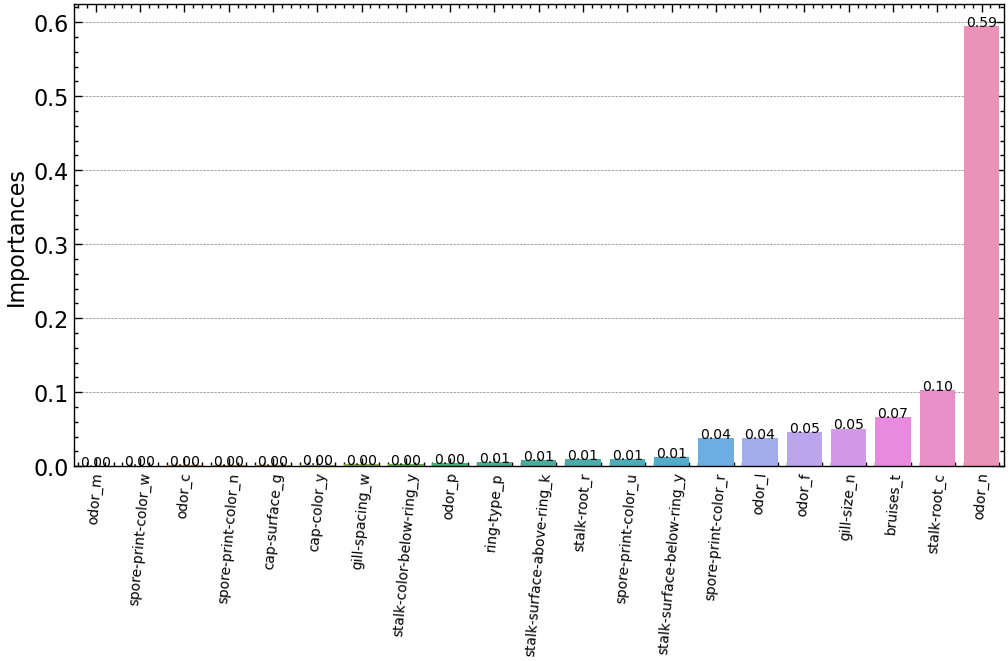

In [37]:
plt.style.use(['science','notebook','grid'])
plt.figure(figsize=(12, 6))
ax = sns.barplot(data = imp_feat_sort , x=imp_feat_sort.index, y='Importances')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2, 
            y = height,
            s = '{:.2f}'.format(height), 
            ha = 'center'
           )
plt.xticks(rotation= 85, size= 10)
plt.show()

As we can see our new model think `odor_n` as the most important one.